# Figures 8 and 9

Consider the family of bidirectional payment streams $\{ (\tau_n^\lambda, \Delta_n^\lambda)_{n \geq 1} \}_{\lambda > 0}$ described in Section 5.3.1.

## Fixed $\lambda$

The code for computing the minimal cost, optimal deposits and reset thresholds for $\lambda = 1/5$ is given below:

In [82]:
import numpy as np
from scipy.optimize import root
from dataclasses import dataclass
import matplotlib.pyplot as plt
import import_ipynb
import GeneralMethod  # Call functions from GeneralMethod without duplicating code

In [84]:
lam = 1/5

def I_mix(x, y, p, lam_A, lam_B):
    if x >= 0:
        return p * (np.exp(-lam_B * x) - np.exp(-lam_B * y))
    elif y <= 0:
        return (1 - p) * (np.exp(lam_A * y)-np.exp(lam_A * x))
    else:
        return 1 - (1 - p) * np.exp(lam_A * x) - p * np.exp(-lam_B * y)

def I(x,y):
    return I_mix(x, y, 2/3, lam/2, lam) # On average, Alice's payment size is double Bob's but only occurs half as often

In [86]:
params = GeneralMethod.PaymentParams(
    l_A = 75, 
    l_B = 75, 
    C = 1.0, 
    D = 2.0, 
    alpha = (1040 * lam ** 2) / (1040 * lam ** 2 + 0.02), 
    n = 1, 
    I = I  # The function I defined above
)

# Find the optimal cost vector
optimal_cost_vector = GeneralMethod.T_n(params)
print("Optimal cost starting at zero with l_A=75 and l_B=75:", optimal_cost_vector[int(2 * params.n * params.l_A)])

Optimal cost starting at zero with l_A=75 and l_B=75: 66.95464251343641


In [64]:
# 75 + 75 + 66.95464251343641 < 225
GeneralMethod.multi_level_search(params, 25, 225, 1, 10, unidirectional=False, symmetric=False, method='hybr')

Starting coarse search with step size: 25, l_max: 225
l_A = 0, l_B = 0, V_n = 2079.999999999837
l_A = 0, l_B = 25, V_n = 648.7799259368736
l_A = 0, l_B = 50, V_n = 361.5971854043445
l_A = 0, l_B = 75, V_n = 270.64440301027645
l_A = 0, l_B = 100, V_n = 238.7402623036752
l_A = 0, l_B = 125, V_n = 230.6632363194246
l_A = 0, l_B = 150, V_n = 234.29462940639496
l_A = 0, l_B = 175, V_n = 244.6314902966955
l_A = 0, l_B = 200, V_n = 259.0123722560745
l_A = 0, l_B = 225, V_n = 276.04766966290595
l_A = 25, l_B = 0, V_n = 650.6660180487091
l_A = 25, l_B = 25, V_n = 353.6489567362393
l_A = 25, l_B = 50, V_n = 253.1255685756379
l_A = 25, l_B = 75, V_n = 222.16126212798946
l_A = 25, l_B = 100, V_n = 216.61405912768873
l_A = 25, l_B = 125, V_n = 222.64207703327583
l_A = 25, l_B = 150, V_n = 234.8380349126818
l_A = 25, l_B = 175, V_n = 250.69328691625375
l_A = 25, l_B = 200, V_n = 268.86746036533856
l_A = 50, l_B = 0, V_n = 367.2602710533981
l_A = 50, l_B = 25, V_n = 265.8082265106457
l_A = 50, l_B = 

(53, 73, 212.06763525431384)

Bob's reset threshold: 68.0
Alice's reset threshold: NA


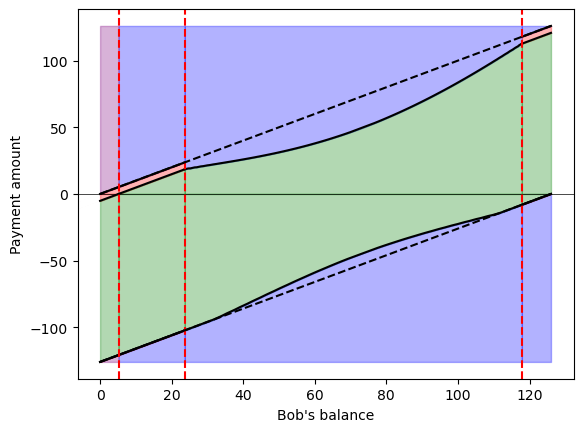

In [67]:
params.l_A = 53 # optimal l_A 
params.l_B = 73 # optimal l_B  

optimal_cost_vector = GeneralMethod.T_n(params) # Compute the corresponding optimal cost vector

GeneralMethod.Optimal_Policy(optimal_cost_vector, 5, params, unidirectional=False)

Bob_reset_threshold = params.l_B - GeneralMethod.calculate_threshold_indices(optimal_cost_vector, params.C, params.D, params.l_A, params.l_B, params.n)[0] / (2 * params.n) if params.l_B - GeneralMethod.calculate_threshold_indices(optimal_cost_vector, params.C, params.D, params.l_A, params.l_B, params.n)[0] / (2 * params.n) < params.l_B else "NA"
Alice_reset_threshold = params.l_B - GeneralMethod.calculate_threshold_indices(optimal_cost_vector, params.C, params.D, params.l_A, params.l_B, params.n)[3] / (2 * params.n) if params.l_B - GeneralMethod.calculate_threshold_indices(optimal_cost_vector, params.C, params.D, params.l_A, params.l_B, params.n)[3] / (2 * params.n) > -params.l_A else "NA"
print("Bob's reset threshold:", Bob_reset_threshold)
print("Alice's reset threshold:", Alice_reset_threshold)

Therefore, the optimal channel deposits are $l_A^* = 53$ and $l_B^* = 73$, the minimal cost is $212$, and the optimal policy is illustrated above.

## Varying $\lambda$

Varying the mean payment amount $\tfrac{1}{\lambda}$ and repeating the above analysis yields the following table:

|       $\tfrac{1}{\lambda}$       |   Minimal cost   |  Alice's optimal deposit  |  Bob's optimal deposit  |  Alice's reset threshold  |   Bob's reset threshold  |
|:--------------------------------:|:----------------:|:-----------------:|:------------------:| :------------------:| :------------------:|
|               1                  |       232        |         76        |        77         |          72          |          74         |
|               2.5                |       231        |         74        |        77         |          69          |          72         |
|               4                  |       222        |         61        |        75         |          61          |          70         |
|               5                  |       212        |         53        |        73         |          --          |          68         | 
|              10                  |       175        |         28        |        52         |          --          |          63         |
|              15                  |       143        |         12        |        66         |          --          |          53         |
|              20                  |       113        |         0         |        35         |          --          |          --         |
|              25                  |       83         |         0         |        3.5        |          --          |          --         |


Spline interpolation allows us to fit a smooth curve through these points, which can then be used to estimate the minimal cost, optimal deposits and reset thresholds at intermediate values.

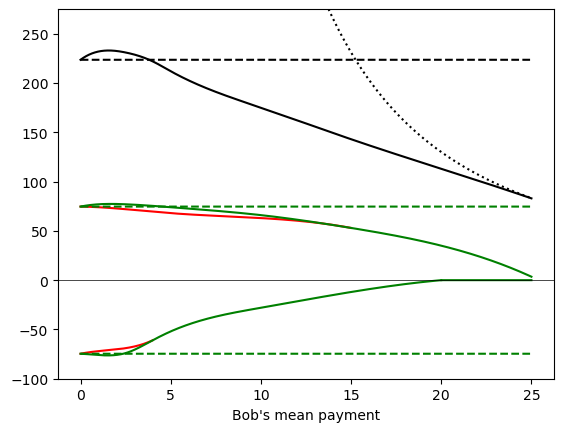

In [75]:
from scipy.interpolate import make_interp_spline

x_Bob_rt_values=np.array([0, 1, 2.5, 5, 10, 15])
Bob_reset_thresholds=np.array([74.65, 74, 72, 68, 63, 53])
X_Bob_RT_Spline = make_interp_spline(x_Bob_rt_values, Bob_reset_thresholds)
X_Bob_RT_ = np.linspace(x_Bob_rt_values.min(), x_Bob_rt_values.max(), 10000)
Bob_RT_ = X_Bob_RT_Spline(X_Bob_RT_)

x_Alice_rt_values=np.array([0, 1, 2.5, 4])
Alice_reset_thresholds=np.array([-74.65, -72, -69, -61])
X_Alice_RT_Spline = make_interp_spline(x_Alice_rt_values, Alice_reset_thresholds)
X_Alice_RT_ = np.linspace(x_Alice_rt_values.min(), x_Alice_rt_values.max(), 10000)
Alice_RT_ = X_Alice_RT_Spline(X_Alice_RT_)

x_oc_values=np.array([0, 1, 2.5, 4, 5, 10, 15, 20, 25])
optimal_cost=np.array([223.6, 232, 231, 222, 212, 175, 143, 113, 83])
X_OC_Spline = make_interp_spline(x_oc_values, optimal_cost)
X_OC_ = np.linspace(x_oc_values.min(), x_oc_values.max(), 10000)
OC_ = X_OC_Spline(X_OC_)

x_Bob_oa_values=np.array([0, 1, 2.5, 5, 10, 15, 20, 25])
Bob_optimal_allocations=np.array([74.65, 77, 77, 74, 66, 53, 35, 3.5])
X_Bob_OA_Spline = make_interp_spline(x_Bob_oa_values, Bob_optimal_allocations)
X_Bob_OA_ = np.linspace(x_Bob_oa_values.min(), x_Bob_oa_values.max(), 10000)
Bob_OA_ = X_Bob_OA_Spline(X_Bob_OA_)

x_Alice_oa_values=np.array([0, 1, 2.5, 4, 5, 10, 15, 20])
Alice_optimal_allocations=np.array([-74.65, -76, -74, -61, -52, -28, -12, 0])
X_Alice_OA_Spline = make_interp_spline(x_Alice_oa_values, Alice_optimal_allocations)
X_Alice_OA_ = np.linspace(x_Alice_oa_values.min(), x_Alice_oa_values.max(), 10000)
Alice_OA_ = X_Alice_OA_Spline(X_Alice_OA_)

plt.plot(X_OC_, OC_, color='black', label='Optimal cost')
plt.plot(X_Bob_RT_, Bob_RT_, color='red', label='Reset threshold')
plt.plot(X_Alice_RT_, Alice_RT_, color='red', label='Reset threshold')
plt.plot(X_Bob_OA_, Bob_OA_, color='green', label='Optimal allocation')
plt.plot(X_Alice_OA_, Alice_OA_, color='green', label='Optimal allocation')
x = np.linspace(0.01, 25, 2500)
z = np.linspace(20.01, 25, 2500)
plt.plot(z, [0]*2500, color='green')
plt.plot(x, 1040/(0.02 * (x**2)), color='black', linestyle='dotted')
plt.plot(x, [74.65]*2500, color='green', linestyle='dashed')
plt.plot(x, [-74.65]*2500, color='green', linestyle='dashed')
plt.plot(x, [223.6]*2500, color='black', linestyle='dashed')
plt.ylim(-100, 275)
plt.xlabel("Bob's mean payment")
plt.axhline(0, color='black', linewidth=0.5)
plt.show()